In [163]:
import requests
import os
import json
import pandas as pd
import numpy as np
import re
from collections import Counter 
import copy
from re import search
import random 
from bs4 import BeautifulSoup
from urllib.request import urlopen
import spacy
nlp = spacy.load('en_core_web_sm')
from tqdm.notebook import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [91]:
source = urlopen('https://en.wikipedia.org/wiki/Non-fungible_token').read()
# Make a soup 
soup = BeautifulSoup(source,'lxml')

content_urls = [i for i in re.findall(r'<a href=([^\s > # ]+)', str(soup.find_all('p')) ) if i != '"']
content_urls = [i.strip('\"') for i in content_urls]
content_urls = ['https://en.wikipedia.org' + i for i in content_urls]

f = open("wikipedia_articles.txt", "w")

for url in content_urls:
    source = urlopen(url).read()
    # Make a soup 
    soup = BeautifulSoup(source,'lxml')

    # Extract the plain text content from paragraphs
    text = ''
    for paragraph in soup.find_all('p'):
        text += paragraph.text

    # dropping footnotes, removing newline chars
    text = re.sub(r'\[.*?\]+', '', text).replace('\n', '')
    f.write(text + '\n')

f.close()

    

In [156]:
preprocessed = []
all_stopwords = nlp.Defaults.stop_words
    
    
f = open("wikipedia_articles.txt", "r")
lines = f.readlines()

for line in tqdm(lines): 
    preprocessed.extend(nlp(line.lower()))


  0%|          | 0/123 [00:00<?, ?it/s]

In [159]:
non_stop_words_frequency = Counter([token.lemma_ for token in preprocessed if (not token.is_stop) and (not token.is_punct)])
common_words = non_stop_words_frequency.most_common(20)
print(common_words)

[('film', 1140), ('game', 1036), ('work', 1009), ('include', 938), ('bitcoin', 786), ('use', 762), ('new', 752), ('release', 734), ('time', 661), ('blockchain', 588), ('copyright', 572), ('year', 562), ('$', 556), ('create', 553), ('company', 547), ('user', 494), ('right', 482), ('\xa0', 471), ('art', 469), ('video', 451)]


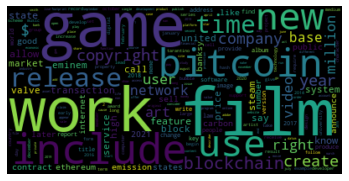

In [164]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=non_stop_words_frequency)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()